# **Try It Yourself**
### *Chapter 15* - **Generating Data**
---

**15-1. Cubes**:

A number raised to the third power is a cube. Plot the first five
cubic numbers, and then plot the first 5000 cubic numbers.

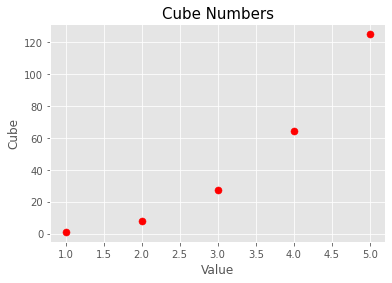

In [14]:
import matplotlib.pyplot as plt

x = [i for i in range(1,6)]
y = [x**3 for x in x]

plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.scatter(x, y, c="red", s=50)

# Set chart title and label axes.
ax.set_title("Cube Numbers", fontsize=15)
ax.set_xlabel("Value", fontsize=12)
ax.set_ylabel("Cube", fontsize=12)
ax.tick_params(axis='both', labelsize=10)

plt.show()

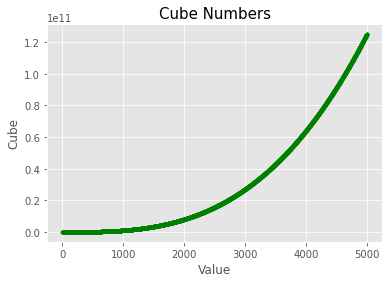

In [10]:
import matplotlib.pyplot as plt

x = [i for i in range(1,5001)]
y = [x**3 for x in x]

plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.scatter(x, y, c="green", s=10)

# Set chart title and label axes.
ax.set_title("Cube Numbers", fontsize=15)
ax.set_xlabel("Value", fontsize=12)
ax.set_ylabel("Cube", fontsize=12)
ax.tick_params(axis='both', labelsize=10)

plt.show()

**15-2. Colored Cubes**: 

Apply a colormap to your cubes plot.

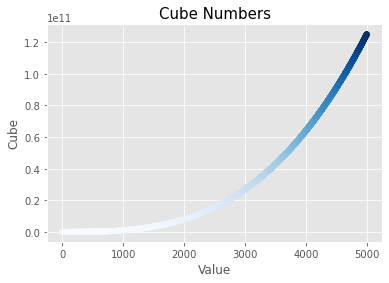

In [16]:
import matplotlib.pyplot as plt

x = [i for i in range(1,5001)]
y = [x**3 for x in x]

plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.scatter(x, y, c=y, s=30, cmap=plt.cm.Blues)

# Set chart title and label axes.
ax.set_title("Cube Numbers", fontsize=15)
ax.set_xlabel("Value", fontsize=12)
ax.set_ylabel("Cube", fontsize=12)
ax.tick_params(axis='both', labelsize=10)

plt.show()

**15-3. Molecular Motion**: 

Modify rw_visual.py by replacing `plt.scatter()` with
`plt.plot()`. To simulate the path of a pollen grain on the surface of a drop of
water, pass in the `rw.x_values` and `rw.y_values`, and include a `linewidth` argument. Use 5000 instead of 50,000 points.

In [1]:
import sys

path = 'D:/Data Science/Python/Practical Books/Python Crash Course/Jupyter Notebooks/Part II - Proyects/Proyect II - Data Visualization/python_work/'
sys.path.append(path)

from random_walk import RandomWalk

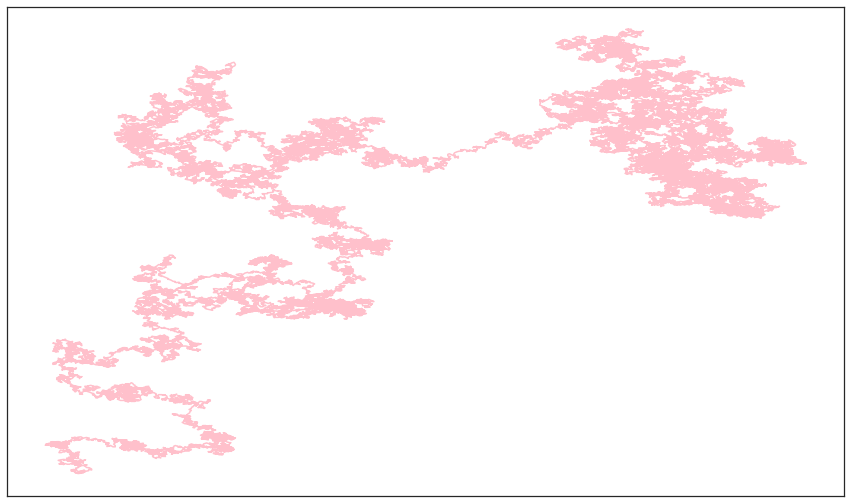

In [10]:
import matplotlib.pyplot as plt

# Make a random walk w/ 50.000 steps
rw = RandomWalk(50_000)
rw.fill_walk()
point_numbers = range(rw.num_points)             

# Plot the points in the walk.
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(15, 9))

ax.plot(rw.x_values, rw.y_values,
        c="pink"
       )

# Remove the axes.
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
                                                
plt.show()

**15-4. Modified Random Walks**: 

In the `RandomWalk class`, `x_step` and `y_step` are
generated from the same set of conditions. The direction is chosen randomly
from the list [1, -1] and the distance from the list [0, 1, 2, 3, 4]. Modify the
values in these lists to see what happens to the overall shape of your walks. Try
a longer list of choices for the distance, such as 0 through 8, or remove the −1
from the x or y direction list.

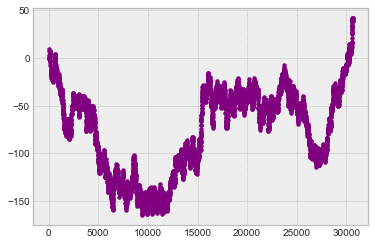

Make another walk? (y/n):  y


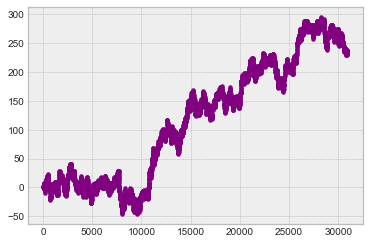

Make another walk? (y/n):  n


In [13]:
import matplotlib.pyplot as plt
from random_walk2 import RandomWalk2

# Keep making new walks, as long as the program is active.
while True:
    
    # Make a random walk.
    rw = RandomWalk2()
    rw.fill_walk()
    
    # Plot the points in the walk.
    plt.style.use('bmh')
    fig, ax = plt.subplots()
    ax.scatter(rw.x_values, rw.y_values, s=15, c="purple")
    plt.show()
    
    keep_running = input("Make another walk? (y/n): ")
    if keep_running == 'n':
        break

**15-5. Refactoring**: 
    
The `fill_walk()` method is lengthy. Create a new method
called `get_step()` to determine the direction and distance for each step, and
then calculate the step. You should end up with two calls to `get_step()` in
`fill_walk()`:

`x_step = self.get_step()`

`y_step = self.get_step()`

This refactoring should reduce the size of `fill_walk()` and make the
method easier to read and understand.

In [17]:
from random import choice

class RandomWalk3:
    """A class to generate random walks."""
    
    def __init__(self, num_points=5000):
        """Initialize attributes of a walk."""
        self.num_points = num_points
        
        # All walks start at (0,0)
        self.x_values = [0]
        self.y_values = [0]
        
    def get_step(self, axis):
        """Determine the distance and direction of each step."""
        x_direction = choice([1, -1])           
        x_distance = choice([0, 1, 2, 3, 4])
        y_direction = choice([1, -1])
        y_distance = choice([0, 1, 2, 3, 4])
        
        if axis == "x":
            return x_direction * x_distance
        elif axis == "y":
            return y_direction * y_distance
        
    def fill_walk(self):                                
        """Calculate all the points in the walk."""     

        while len(self.x_values) < self.num_points:     
                x_step = self.get_step(axis="x")
                y_step = self.get_step(axis="y")
                
                # Reject moves that go nowhere.
                if x_step == 0 and y_step == 0:
                    continue
                    
                # Calculate the new position.
                x = self.x_values[-1] + x_step
                y = self.y_values[-1] + y_step
                self.x_values.append(x)
                self.y_values.append(y)

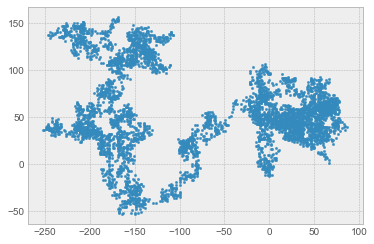

In [26]:
import matplotlib.pyplot as plt

# Make a random walk w/ 5000 steps
rw = RandomWalk3()
rw.fill_walk()

# Plot the points in the walk.
plt.style.use('bmh')
fig, ax = plt.subplots()
ax.scatter(rw.x_values, rw.y_values, s=5)

plt.show()

**15-6. Two D8s**: 

Create a simulation showing what happens when you roll two
eight-sided dice 1000 times. Try to picture what you think the visualization will
look like before you run the simulation; then see if your intuition was correct.
Gradually increase the number of rolls until you start to see the limits of your
system’s capabilities.

In [1]:
import sys

path = 'D:/Data Science/Python/Practical Books/Python Crash Course/Jupyter Notebooks/Part II - Proyects/Proyect II - Data Visualization/python_work/'
sys.path.append(path)

from die import Die

In [2]:
from plotly.graph_objs import Bar, Layout
from plotly import offline

# Create two D8 dice.
die_1 = Die(8)
die_2 = Die(8)

# Make some rolls, and store results in a list.
results = []
for roll_num in range(1000):
    result = die_1.roll() + die_2.roll()
    results.append(result)

# Analyze the results.
frequencies = []
max_result = die_1.num_sides + die_2.num_sides
min_result = 2

for value in range(min_result, max_result+1):
    frequency = results.count(value)
    frequencies.append(frequency)

# Visualize the results.
x_values = list(range(2, max_result+1))
data = [Bar(x=x_values, y=frequencies)]

x_axis_config = {'title': 'Result', 'dtick': 1}
y_axis_config = {'title': 'Frequency of Result'}
my_layout = Layout(title='Results of rolling two D8 dice 1000 times',
                   xaxis=x_axis_config, yaxis=y_axis_config)

offline.plot({'data': data, 'layout': my_layout}, filename='d8_d8.html')

'd8_d8.html'

**15-7. Three Dice:**

When you roll three D6 dice, the smallest number you can roll
is 3 and the largest number is 18. Create a visualization that shows what happens when you roll three D6 dice.

In [3]:
from plotly.graph_objs import Bar, Layout
from plotly import offline

# Create 3 D6 dice.
die_1 = Die()
die_2 = Die()
die_3 = Die()

# Make some rolls, and store results in a list.
results = []
for roll_num in range(1000):
    result = die_1.roll() + die_2.roll() + die_3.roll()
    results.append(result)

# Analyze the results.
frequencies = []
max_result = die_1.num_sides + die_2.num_sides + die_3.num_sides # 18
min_result = 3 # 3

for value in range(min_result, max_result+1):
    frequency = results.count(value)
    frequencies.append(frequency)

# Visualize the results.
x_values = list(range(min_result, max_result+1))
data = [Bar(x=x_values, y=frequencies)]

x_axis_config = {'title': 'Result', 'dtick': 1}
y_axis_config = {'title': 'Frequency of Result'}
my_layout = Layout(title='Results of rolling three D6 dice 1000 times',
                   xaxis=x_axis_config, yaxis=y_axis_config)

offline.plot({'data': data, 'layout': my_layout}, filename='d6_d6_d6.html')

'd6_d6_d6.html'

**15-8. Multiplication**: 

When you roll two dice, you usually add the two numbers
together to get the result. Create a visualization that shows what happens if
you multiply these numbers instead.

In [17]:
results = []

for i in range(1,6+1):
    for j in range(1,6+1):
        result = i*j
        results.append(result)
        
omega = list(set(results))
omega.sort()
omega

[1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15, 16, 18, 20, 24, 25, 30, 36]

In [18]:
from plotly.graph_objs import Bar, Layout
from plotly import offline

# Create two D6 dice.
die_1 = Die()
die_2 = Die()

# Make some rolls, and store results in a list.
results = []
for roll_num in range(1000):
    result = die_1.roll() * die_2.roll()
    results.append(result)

# Analyze the results.
frequencies = []
#max_result = die_1.num_sides * die_2.num_sides
#min_result = 1

for value in omega:
    frequency = results.count(value)
    frequencies.append(frequency)

# Visualize the results.
x_values = omega
data = [Bar(x=x_values, y=frequencies)]

x_axis_config = {'title': 'Result', 'dtick': 1}
y_axis_config = {'title': 'Frequency of Result'}
my_layout = Layout(title='Multiplying the results of rolling two D6 dice 1000 times',
                   xaxis=x_axis_config, yaxis=y_axis_config)

offline.plot({'data': data, 'layout': my_layout}, filename='d6_d6.html')

'd6_d6.html'

**15-9. Die Comprehensions**: 

For clarity, the listings in this section use the long
form of for loops. If you’re comfortable using list comprehensions, try writing a
comprehension for one or both of the loops in each of these programs.

In [19]:
from plotly.graph_objs import Bar, Layout
from plotly import offline

# Create two D6 dice.
die_1 = Die()
die_2 = Die()

# Make some rolls, and store results in a list.
results = [die_1.roll() + die_2.roll() for roll_num in range(1000)]

# Analyze the results.
frequencies = []
max_result = die_1.num_sides + die_2.num_sides
min_result = 2
frequencies = [results.count(value) for value in range(min_result, max_result+1)]

# Visualize the results.
x_values = list(range(2, max_result+1))
data = [Bar(x=x_values, y=frequencies)]

x_axis_config = {'title': 'Result', 'dtick': 1}
y_axis_config = {'title': 'Frequency of Result'}
my_layout = Layout(title='Results of rolling two D6 dice 1000 times',
                   xaxis=x_axis_config, yaxis=y_axis_config)

offline.plot({'data': data, 'layout': my_layout}, filename='d6_d6.html')

'd6_d6.html'

**15-10. Practicing with Both Libraries**: 

Try using Matplotlib to make a die-rolling visualization, and use Plotly to make the visualization for a random walk. (You’ll
need to consult the documentation for each library to complete this exercise.)